In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = pd.read_csv('/content/drive/MyDrive/colab/python basic/dataset/tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [4]:
party_counts = pd.crosstab(tips['day'],tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [5]:
pd.pivot_table(tips, index='day',columns='size',values='total_bill',aggfunc='count',fill_value=0)

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [6]:
pc_25 = party_counts.loc[:,2:5]
pc_25

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [7]:
pc_25.sum(1)

day
Fri     18
Sat     85
Sun     75
Thur    58
dtype: int64

In [9]:
pc_25.div(pc_25.sum(1),axis=0)

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


   total_bill   tip smoker  day    time  size   tip_pct
0       16.99  1.01     No  Sun  Dinner     2  0.063204
1       10.34  1.66     No  Sun  Dinner     3  0.191244
2       21.01  3.50     No  Sun  Dinner     3  0.199886
3       23.68  3.31     No  Sun  Dinner     2  0.162494
4       24.59  3.61     No  Sun  Dinner     4  0.172069


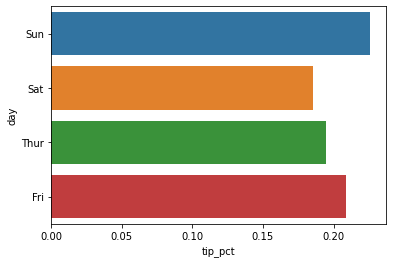

In [10]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill']-tips['tip'])
print(tips.head())
sns.barplot(x='tip_pct',y='day',data=tips,orient='h',ci=None)

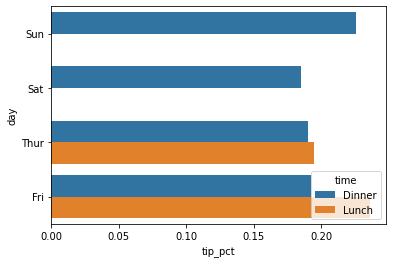

In [11]:
sns.barplot(x='tip_pct',y='day',hue='time',data=tips,orient='h',ci=None)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


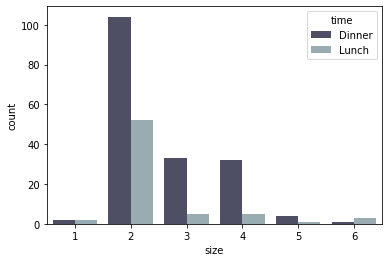

In [12]:
sns.countplot('size',data=tips,hue='time',palette='bone')

In [13]:
comp1 = np.random.normal(0,1,size=200)
comp2 = np.random.normal(10,2,size=200)
values = pd.Series(np.concatenate([comp1,comp2]))
values.describe()

count    400.000000
mean       4.952040
std        5.266193
min       -3.114850
25%       -0.033528
50%        3.505307
75%        9.806833
max       15.462146
dtype: float64

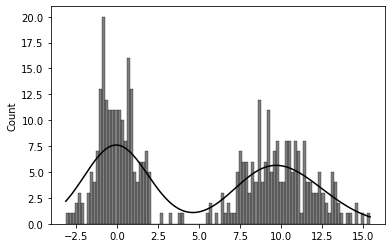

In [15]:
sns.histplot(values,bins=100,color='k',kde=True)

In [16]:
fish_multi = pd.read_csv('/content/drive/MyDrive/colab/python basic/dataset/4_fm2.csv')
fish_multi.head()

,species,length
0,A,2
1,A,3
2,A,3
3,A,4
4,A,4


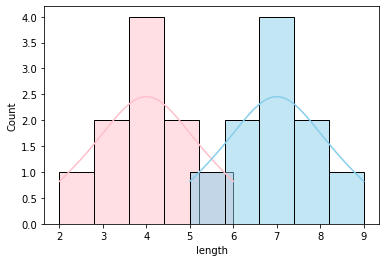

In [17]:
length_a = fish_multi.query('species=="A"')['length']
length_b = fish_multi.query('species=="B"')['length']
sns.histplot(length_a,bins=5, color='pink',kde=True)
sns.histplot(length_b,bins=5, color='skyblue',kde=True)

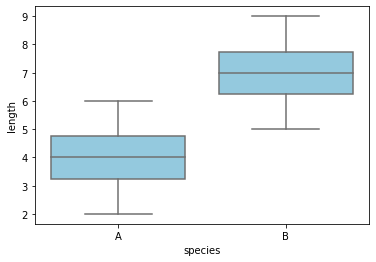

In [19]:
sns.boxplot(x='species',y='length',data = fish_multi,color='skyblue')

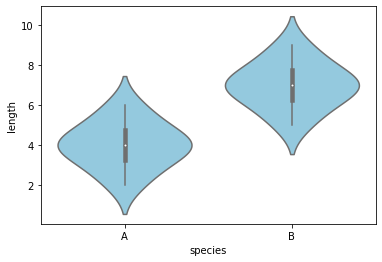

In [21]:
sns.violinplot(x='species',y='length',data=fish_multi,color='skyblue')

In [22]:
cov_data = pd.read_csv('/content/drive/MyDrive/colab/python basic/dataset/4_cov.csv')
cov_data

,x,y
0,18.5,34
1,18.7,39
2,19.1,41
3,19.7,38
4,21.5,45
5,21.7,41
6,21.8,52
7,22.0,44
8,23.4,44
9,23.8,49


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


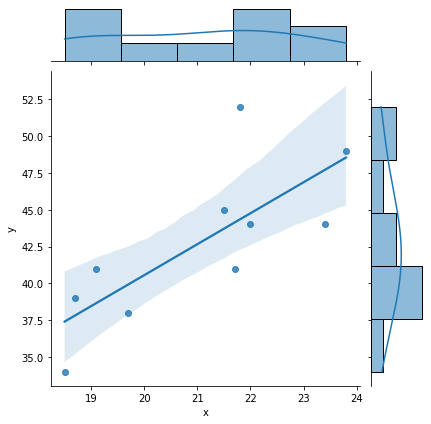

In [23]:
sns.jointplot(cov_data.x,cov_data.y,kind='reg')

In [24]:
import pandas as pd
df_auto = pd.read_excel('/content/drive/MyDrive/colab/python basic/dataset/auto-mpg.xlsx')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


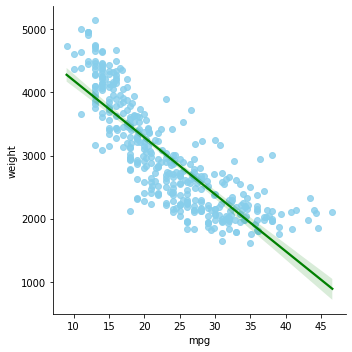

In [26]:
sns.lmplot(x='mpg',y='weight',data=df_auto,scatter_kws={'color':'skyblue'},line_kws={'color':'green'})

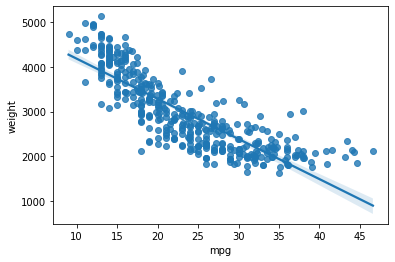

In [27]:
sns.regplot(x='mpg',y='weight',data=df_auto)

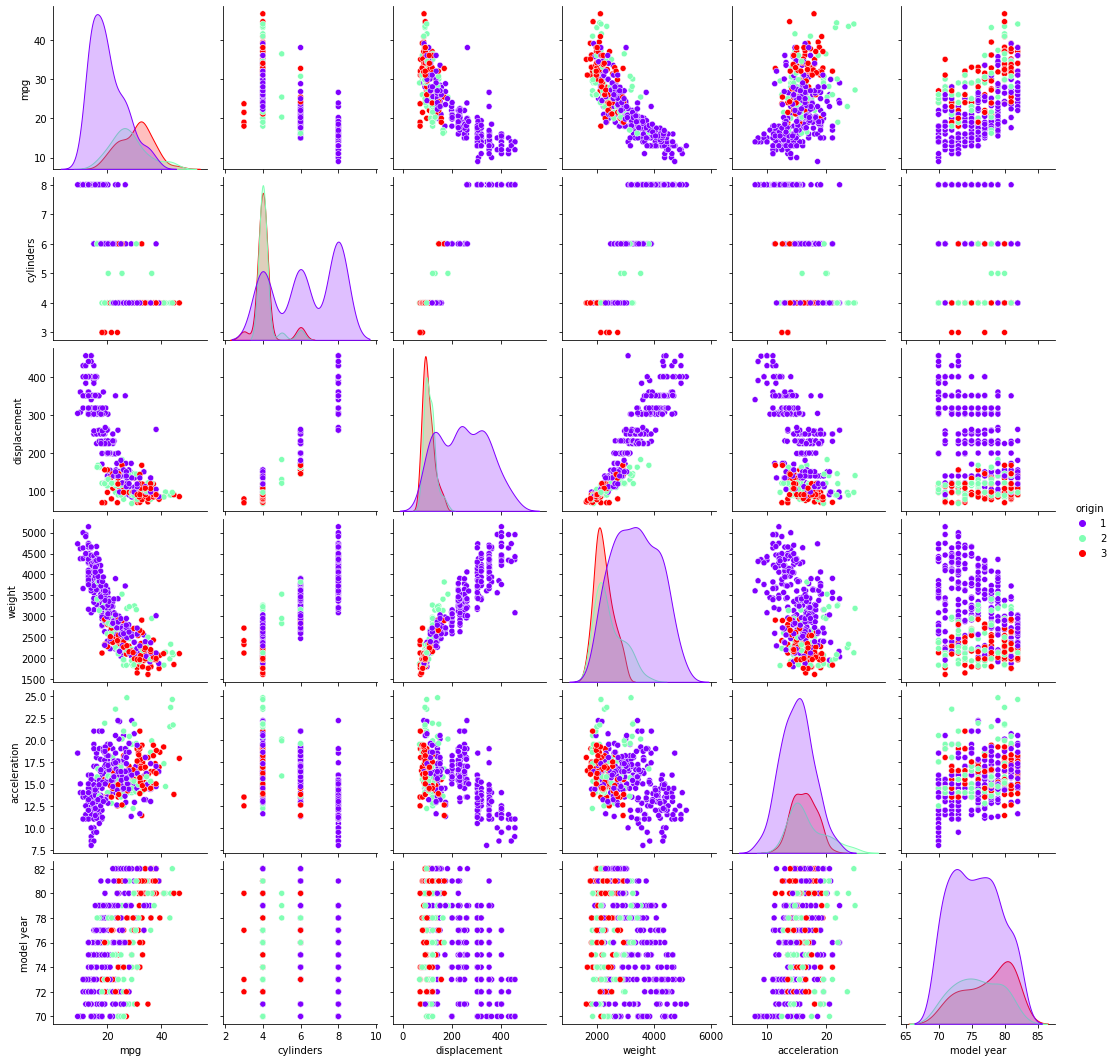

In [28]:
import seaborn as sns
sns.pairplot(df_auto,hue='origin',palette='rainbow')

Text(0.5, 1.0, 'Heatmap of the Dataset')

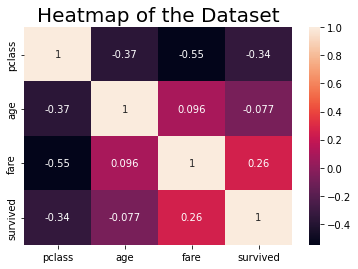

In [29]:
t_df = sns.load_dataset('titanic')
t_df[['pclass','age','fare','survived']].corr()
sns.heatmap(t_df[['pclass','age','fare','survived']].corr(),annot=True)
plt.title('Heatmap of the Dataset',fontsize=20)

In [32]:
table = t_df.pivot_table(index=['sex'],columns=['class'],values=['survived'],aggfunc='mean')
table

survived                    
class      First    Second     Third
sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447

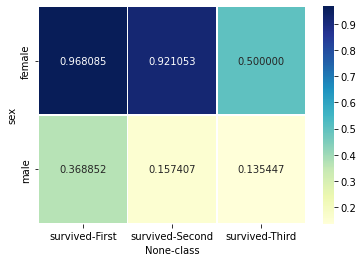

In [33]:
sns.heatmap(table, annot=True, fmt='f',cmap='YlGnBu',linewidth=.5,cbar=True)

In [34]:
import numpy as np
fish_data = np.array([5,7,9,1,5,6,6,2,4,4,5,6,7,3,8,10])

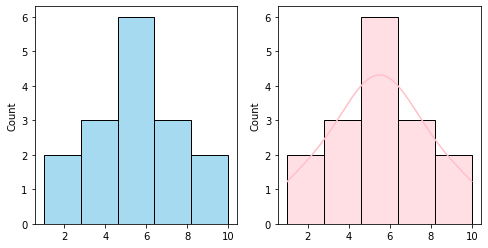

In [35]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
sns.histplot(fish_data, color='skyblue',kde=False, ax=ax1)
sns.histplot(fish_data, color='pink',kde=True,ax=ax2)